# Part I - (Analysis of Ford GoBike System Data)
## by (Deborah Odebunmi)

## Introduction
> This data set on Ford GoBike includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset includes information on 183,412 trips and features such as the user type, gender, station details and trip duration amongst others. 

 



## Preliminary Wrangling


In [89]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [90]:
##to load my datatset
ford_bike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [91]:
## a quick glance at the dataset
ford_bike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No


In [92]:
ford_bike.shape

(183412, 16)

In [93]:
ford_bike.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
137749,654,2019-02-08 08:20:27.6980,2019-02-08 08:31:22.2090,70.0,Central Ave at Fell St,37.773311,-122.444293,383.0,Golden Gate Ave at Franklin St,37.780787,-122.421934,2947,Customer,1989.0,Male,No
156468,346,2019-02-06 07:55:23.3090,2019-02-06 08:01:10.1120,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,64.0,5th St at Brannan St,37.776754,-122.399018,3035,Subscriber,1964.0,Male,No


In [94]:
ford_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [95]:
ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


### What is the structure of your dataset?

> My dataset comprises 183,412 entries and 16 variables as the columns.
A look at the data types of some of the columns also revealed that there are changes to be made. Columns relating to time are currently objects. The data type will be converted.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in determining if a particular gender uses this service more than the other gender. It will also be interesting to know the busiest stations, what age group tend to use this service more, and if there are more customers than subscribers or vice-versa.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The member birth year column plays a role in determining the age of the rider so this will come in helpful. The user_type, gender and station names will also support my investigation

## Data Cleaning Process


In [96]:
##convert the start and end time columns to date types
ford_bike['start_time'] = ford_bike['start_time'].astype('datetime64[ns]')
ford_bike['end_time'] = ford_bike['end_time'].astype('datetime64[ns]')

In [97]:
##to confirm that the datatypes of the start and end times have been chnaged
ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

The above shows that there are some missing values in the dataset and this will be treated below.

In [98]:
##this helps us know how many missing values for each column in the df

ford_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

There are 197 missing observations for station details and 8265 for gender and birth year details. The figures are less than 5% of the dataset so I do not think removing them will have so much impact on the analysis. They will be deleted in the next cell.

In [99]:
ford_bike.dropna(axis = 0 , inplace = True)

In [100]:
#to confirm we do not have any null values

ford_bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

Now that the null values have been removed, I will proceed to changing the datatypes and adding new columns

In [101]:
##change the data types of user_type, member_gender and bike_share_for_all_trip to category

ford_bike['member_gender'] = ford_bike['member_gender'].astype('category')
ford_bike['user_type'] = ford_bike['user_type'].astype('category')
ford_bike['bike_share_for_all_trip'] = ford_bike['bike_share_for_all_trip'].astype('category')

In [102]:
##I will also change the birth year from float to integer. Birth years cannot have decimals.
ford_bike['member_birth_year'] = ford_bike['member_birth_year'].astype('int')


In [103]:
##to confirm that the data types have been changed

print(ford_bike['member_gender'].dtype)
print(ford_bike['user_type'].dtype)
print(ford_bike['bike_share_for_all_trip'].dtype)
ford_bike.member_birth_year.dtype


category
category
category


dtype('int64')

In this next step, I included two new columns to specify the exact weekday and month name that the start times fall in.

In [104]:
## I will also like to include columns that specify the exact weekday, month name and start hour that the start times fall in.

ford_bike["start_day"] = ford_bike['start_time'].dt.day_name()
ford_bike["start_month"] = ford_bike['start_time'].dt.month_name()
ford_bike['start_hour'] = ford_bike.start_time.dt.strftime('%H')

#to view the data and and new added columns
ford_bike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thursday,February,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thursday,February,12


I will also group the member birth year column into categories, based on generations they fall in. A function was created for this and then applied to the member_birth_year_column. A new column was created with the output of this function.

It should be noted that although the minimum birth year in the datatset is 1878, it is quite unlikely that someone of that age will ride a bike so this will be excluded from the function and from the analysis too. There is also just one person that has this birth year. There are also records of members with birth years of 1900 and the likes. Highly unlikely that people this age(90 years and upwards) will ride bikes. I will also be removing them from the dataset.

In [105]:
sorted(list(ford_bike.member_birth_year.unique()))

[1878,
 1900,
 1901,
 1902,
 1910,
 1920,
 1927,
 1928,
 1930,
 1931,
 1933,
 1934,
 1938,
 1939,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001]

In [106]:
#3change the dataset to include only those with birth year above 1928

ford_bike = ford_bike[(ford_bike.member_birth_year > 1928)]
ford_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000
mean,704.028009,138.981141,37.771206,-122.351758,136.604655,37.771401,-122.351334,4482.518273,1984.839726
std,1642.537925,111.637185,0.100409,0.117748,111.333687,0.100314,0.117311,1659.218012,9.968641
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1930.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


I will be grouping the birth year into categories called generations.

In [107]:
## this function groups the birth year into categories

def age_col(birth_year):
    if birth_year >= 1928 and birth_year <= 1945:
        return('Post War')
    elif birth_year >= 1946 and birth_year <= 1964:
        return('Baby Boomers')
    elif birth_year >= 1965 and birth_year <= 1980:
        return('Gen X')
    elif birth_year >= 1981 and birth_year <= 1996:
        return('Millenials')
    elif birth_year >= 1997 and birth_year <= 2012:
        return('Gen Z')
    else: np.NaN

In [108]:
ford_bike['generation'] = ford_bike['member_birth_year'].apply(age_col)

In [109]:
##Since the generation column gotten from year of birth actually comes in an order, I will make this column a categorical variable. This is to ensure that my visualisations make use of this and specify the older generations first.
 

ford_bike['generation'] = pd.Categorical(ford_bike['generation'], categories=
    ['Post War','Baby Boomers','Gen X','Millenials','Gen Z'],
    ordered=True)

For the duration_sec column, the max value is 84548, which is an outlier. This is obvious from the dataset description which shows the values of the 25th, 50th and 75th percentile. The value is far from the other figures.

The values of the percentiles are also shown below. This helps me decide what part of the dataset to focus on for my analysis.

In [110]:
##grouping the duration in seconds per percentile
## this is to enable me decide the values to keep

time_range = list(np.arange(0.1, 1, 0.01))
ford_bike['duration_sec'].quantile(time_range)

0.10     213.00
0.11     222.00
0.12     230.00
0.13     237.00
0.14     245.00
0.15     252.00
0.16     260.00
0.17     267.00
0.18     274.00
0.19     281.00
0.20     288.00
0.21     295.00
0.22     302.00
0.23     309.00
0.24     316.00
0.25     323.00
0.26     330.00
0.27     337.00
0.28     344.00
0.29     350.00
0.30     357.00
0.31     364.00
0.32     372.00
0.33     379.00
0.34     386.00
0.35     393.00
0.36     401.00
0.37     409.00
0.38     416.00
0.39     423.00
         ...   
0.70     718.00
0.71     731.00
0.72     745.00
0.73     759.00
0.74     774.00
0.75     789.00
0.76     805.00
0.77     822.00
0.78     839.00
0.79     858.00
0.80     877.00
0.81     897.00
0.82     918.00
0.83     939.00
0.84     964.00
0.85     990.00
0.86    1017.00
0.87    1049.00
0.88    1081.00
0.89    1118.00
0.90    1161.00
0.91    1210.00
0.92    1266.00
0.93    1337.00
0.94    1420.00
0.95    1531.00
0.96    1686.00
0.97    1905.00
0.98    2271.52
0.99    3176.00
Name: duration_sec, Leng

In [111]:
##to see the duration_sec for specific quartiles

time_range = list(np.arange(0.1, 1, 0.01))
ford_bike['duration_sec'].quantile([0.25,0.50,0.75,0.90,0.95,0.99,0.995,0.999,0.9999])

0.2500      323.0000
0.5000      510.0000
0.7500      789.0000
0.9000     1161.0000
0.9500     1531.0000
0.9900     3176.0000
0.9950     5039.8900
0.9990    19938.1260
0.9999    69713.8058
Name: duration_sec, dtype: float64

I will be focusing on the 99.5% quartile and delete records with seconds above the value of this quartile

In [112]:
ford_bike = ford_bike[ford_bike['duration_sec'] <= ford_bike['duration_sec'].quantile(0.995)]




In [113]:
ford_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174000.000000,174000.000000,174000.000000,174000.000000,174000.000000,174000.000000,174000.000000,174000.000000,174000.000000
mean,629.045966,138.950006,37.771183,-122.351638,136.510184,37.771374,-122.351211,4481.967810,1984.844874
std,484.450628,111.530261,0.100503,0.117818,111.190188,0.100400,0.117371,1659.278635,9.966717
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1930.000000
25%,322.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,508.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397405,4960.000000,1987.000000
75%,783.000000,239.000000,37.797320,-122.283093,237.000000,37.797673,-122.285633,5505.000000,1992.000000
max,5038.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [114]:
ford_bike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hour,generation
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.24878,4898,Subscriber,1974,Male,Yes,Thursday,February,23,Gen X
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.40595,5200,Subscriber,1959,Male,No,Thursday,February,23,Baby Boomers


In [115]:
## create a column to convert duration seconds to minutes

ford_bike['duration_mins'] = round(ford_bike['duration_sec']/60,0).astype('int')
ford_bike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hour,generation,duration_mins
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,Thursday,February,23,Gen X,26
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,Thursday,February,23,Baby Boomers,30


In [116]:
ford_bike[['duration_mins','duration_sec']].head()

,duration_mins,duration_sec
4,26,1585
5,30,1793
6,19,1147
7,27,1615
8,26,1570


In [117]:
##calculate the age of the rider. 2019 is used as base year because the records are from 2019.

ford_bike['rider_age'] = 2019- ford_bike['member_birth_year']
ford_bike['rider_age'] = ford_bike['rider_age'].astype('int')

ford_bike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hour,generation,duration_mins,rider_age
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,Thursday,February,23,Gen X,26,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,Thursday,February,23,Baby Boomers,30,60


The clean data will be exported to a csv file

In [118]:
ford_bike.to_csv('bike_data_clean.csv', index = False)


# Data Exploration


## Univariate Exploration




**Question: What generation is the most users of the bike sharing system?**


In [119]:
# take a count of riders per generation
gen_counts = ford_bike.generation.value_counts()
gen_counts

Millenials      117848
Gen X            36360
Gen Z            10846
Baby Boomers      8654
Post War           292
Name: generation, dtype: int64

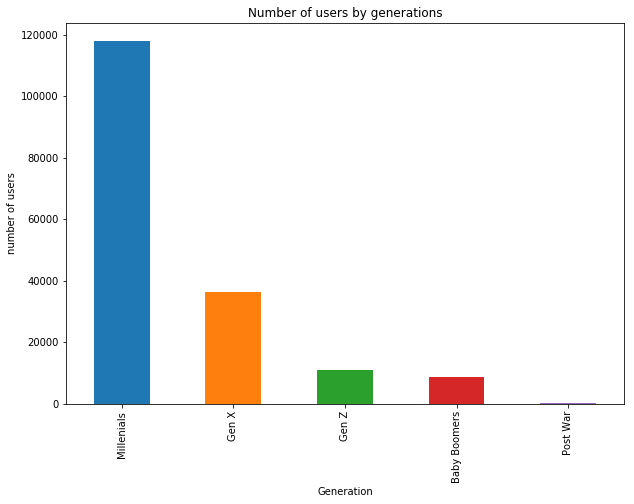

In [120]:
plt.figure(figsize=(10,7))
gen_counts.plot(kind = 'bar', title = 'Number of users by generations')
plt.xlabel('Generation')
plt.ylabel('number of users');

**Observation:** The millenials have the highest count among those who use the bike sharing system.Their number is more than thrice the number for the generation with the next highest count. The Post War generation has the least number of users which is expected, due to their ages.

**Question: What day of the week is the busiest and what day is the least busy day?**


To do this, I want to order the week days before plotting the graph. To do this, I order the week days into categories.

In [121]:
##I am assuming Monday to be the first day of the week, this explains why the first day in my list is Monday and not SUnday. 

ford_bike['start_day'] = pd.Categorical(ford_bike['start_day'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)


In [122]:
## count the rides per day

rides_by_day = ford_bike.start_day.value_counts()
rides_by_day = rides_by_day.sort_index()
print(rides_by_day)




Monday       25486
Tuesday      30482
Wednesday    28304
Thursday     33576
Friday       27533
Saturday     14278
Sunday       14341
Name: start_day, dtype: int64


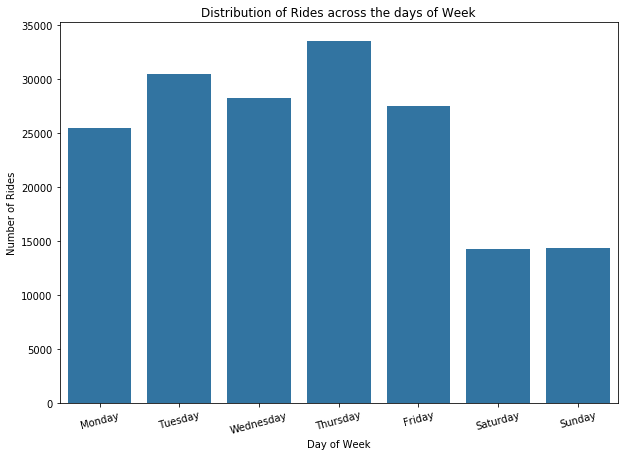

In [123]:

base_color = sb.color_palette()[0]## to ensure the graph has just one color for the bars
plt.figure(figsize=(10,7))
sb.countplot(data = ford_bike, x = 'start_day', color = base_color);
plt.title('Distribution of Rides across the days of Week')
plt.xlabel('Day of Week')
plt.xticks(rotation = 15)
plt.ylabel('Number of Rides')
plt.show()

**Observation:** First thing I noticed was there are more riders on the days of the week than weekends. This probably means more people use the bikes to work. However, Thursday has the highest count among the week days. I guess there is something "special" about Thursdays!. Is there a discount? Does an event happen?

**Question:** Is there a particular gender that uses this service more or are the figures evenly distributed across genders?


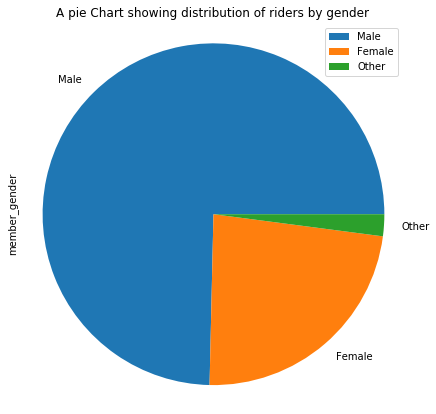

In [124]:
gender_cnt = ford_bike.member_gender.value_counts()
gender_cnt
plt.figure(figsize=(10,7))
gender_cnt.plot(kind = 'pie', title = 'A pie Chart showing distribution of riders by gender')
plt.axis('square')
plt.legend();

**Observation:** The male gender has more users of the bike sharing system than other genders

**Question:** What category of user types use the service more?


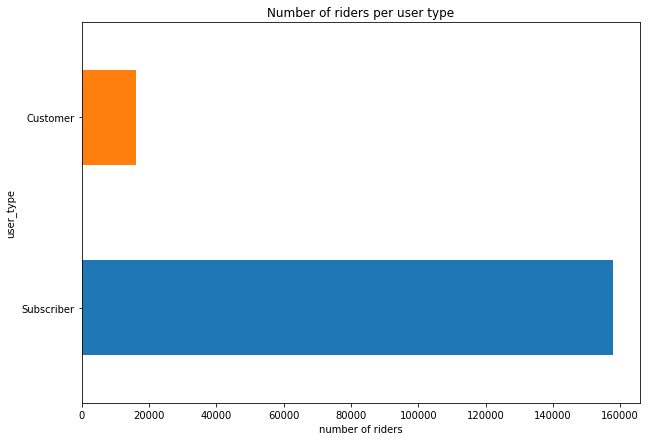

In [125]:
user_cnt = ford_bike.user_type.value_counts()
user_cnt
plt.figure(figsize=(10,7))
user_cnt.plot(kind = 'barh', title = 'Number of riders per user type')
plt.ylabel('user_type')
plt.xlabel('number of riders');

#plt.legend();

**Observation:** The bar graph above shows that there are more subscribers using the bike sharing system than "regular" customers

**Question:** How often do people opt for the bike share for all trip option?


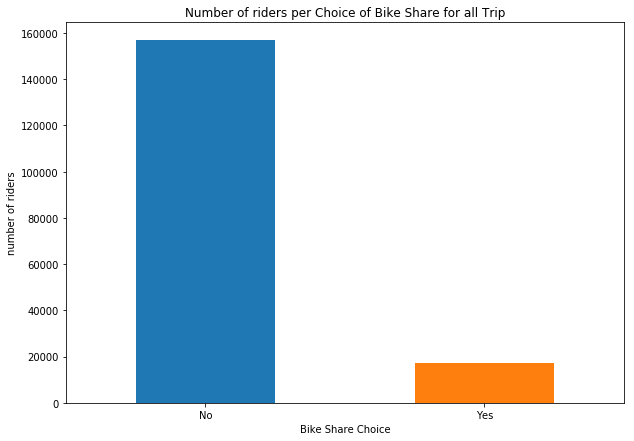

In [126]:
bike_share_cnt = ford_bike.bike_share_for_all_trip.value_counts()
bike_share_cnt
plt.figure(figsize=(10,7))
bike_share_cnt.plot(kind = 'bar', title = 'Number of riders per Choice of Bike Share for all Trip')
plt.xlabel('Bike Share Choice')
plt.ylabel('number of riders')
plt.xticks(rotation = 0);

**Observation:** It can be seen that there are more riders who do not opt for the bike share for all trip than those who do.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>There were some unusual points in the variables I analysed. For the member birth year, there were riders above 90 years old. There was a major outlier there, aged 141. It is very unlikely that that is accurate. This was removed from my dataset and I transformed the dataset to feature only customers 90 years and below.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I also changed the form of some columns and also added new columns to make the analysis easier. I also extracted week day from the start time so I could get a column that shows the exact day of the week. I grouped the riders into categories by the year of birth they were born in.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [127]:
ford_bike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hour,generation,duration_mins,rider_age
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,Thursday,February,23,Gen X,26,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,Thursday,February,23,Baby Boomers,30,60


In [128]:
ford_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_mins,rider_age
count,174000.000000,174000.000000,174000.000000,174000.000000,174000.000000,174000.000000,174000.000000,174000.000000,174000.000000,174000.000000,174000.000000
mean,629.045966,138.950006,37.771183,-122.351638,136.510184,37.771374,-122.351211,4481.967810,1984.844874,10.483914,34.155126
std,484.450628,111.530261,0.100503,0.117818,111.190188,0.100400,0.117371,1659.278635,9.966717,8.078353,9.966717
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1930.000000,1.000000,18.000000
25%,322.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,5.000000,27.000000
50%,508.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397405,4960.000000,1987.000000,8.000000,32.000000
75%,783.000000,239.000000,37.797320,-122.283093,237.000000,37.797673,-122.285633,5505.000000,1992.000000,13.000000,39.000000
max,5038.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,84.000000,89.000000


For this section, I will be creating clustered bar charts to compare different variables.
To avoid repetition, I will be creating a function for this.

In [129]:
## to create the function
## this function accepts two parameters, which are the variables of interest.

def clust_bar(cat_var,cat_var_2, palette = None):
    
    plt.figure(figsize=(10,7))
    sb.countplot(data = ford_bike, x = cat_var, hue = cat_var_2, palette = palette)
    plt.title (f'''Distribution of {cat_var} by {cat_var_2}'''.title())
    

#clust_bar('generation','user_type')

**Question:** Is there a relationship between riders generation and the duration they ride?

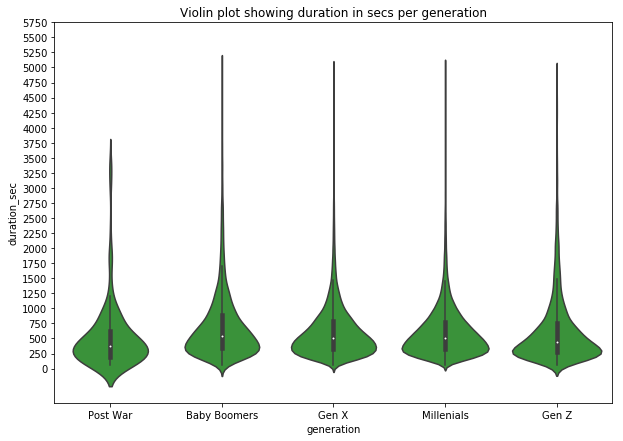

In [130]:
base_color = sb.color_palette()[2]
plt.figure(figsize=(10,7))
sb.violinplot(data = ford_bike, x='generation', y= 'duration_sec', color = base_color)
plt.title('Violin plot showing duration in secs per generation')
plt.yticks(np.arange(0, 6000, step=250));



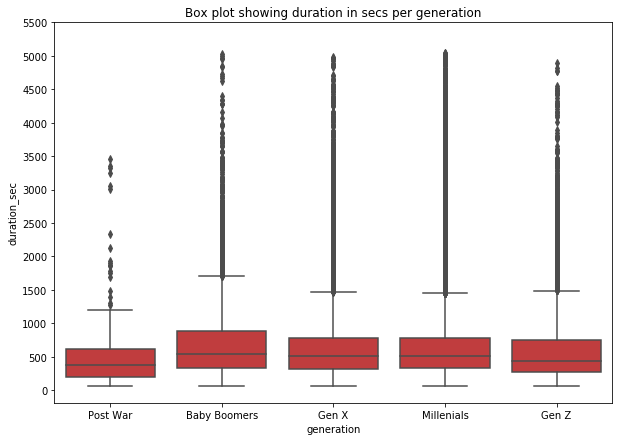

In [131]:
base_color = sb.color_palette()[3]
plt.figure(figsize=(10,7))
sb.boxplot(data = ford_bike, x='generation', y= 'duration_sec', color = base_color)
plt.title('Box plot showing duration in secs per generation')
plt.yticks(np.arange(0, 6000, step=500));


**Observation:** The box plot gives more summary details visibly than the violin plot. From the box plot, it is noticed that the Baby Boomers ride for the longest time compared to the other generations.The Post War generation have the least riding duration and this is likely due to age.

The violin plot also reveals that most data points are centered between 250 to 500 seconds for all five generations.

**Question:** What generation tends to a particular user type more?

For this question, I group the dataset by user type and generation, convert to a dataframe and plot the charts

In [132]:
#this is to group the dataset by generation and user type.

gen_user_cnt = ford_bike.groupby(['generation', 'user_type']).size()
gen_user_cnt

generation    user_type 
Post War      Customer          10
              Subscriber       282
Baby Boomers  Customer         656
              Subscriber      7998
Gen X         Customer        3116
              Subscriber     33244
Millenials    Customer       11133
              Subscriber    106715
Gen Z         Customer        1188
              Subscriber      9658
dtype: int64

In [133]:
# Use Series.reset_index() to convert a series into a dataframe object
gen_user_cnt = gen_user_cnt.reset_index(name = 'count')
gen_user_cnt

,generation,user_type,count
0,Post War,Customer,10
1,Post War,Subscriber,282
2,Baby Boomers,Customer,656
3,Baby Boomers,Subscriber,7998
4,Gen X,Customer,3116
5,Gen X,Subscriber,33244
6,Millenials,Customer,11133
7,Millenials,Subscriber,106715
8,Gen Z,Customer,1188
9,Gen Z,Subscriber,9658


In [134]:
# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows

gen_user_cnt = gen_user_cnt.pivot(index='generation', columns = 'user_type', values = 'count')
gen_user_cnt

user_type,Customer,Subscriber
generation,,
Post War,10,282
Baby Boomers,656,7998
Gen X,3116,33244
Millenials,11133,106715
Gen Z,1188,9658


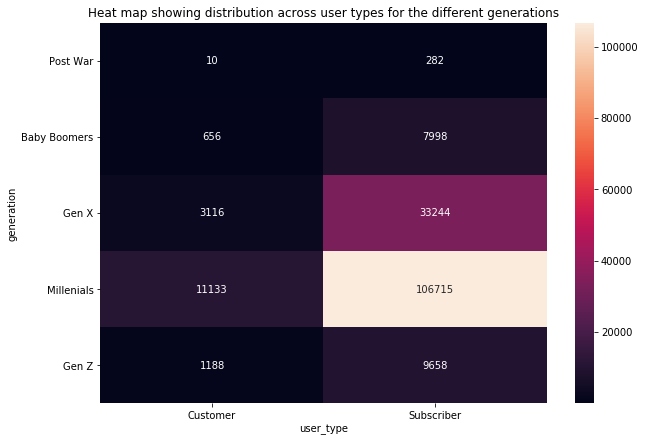

In [135]:
##to create the heatmap

plt.figure(figsize=(10,7))
plt.title('Heat map showing distribution across user types for the different generations')
sb.heatmap(gen_user_cnt, annot= True, fmt = 'd')
plt.yticks(rotation = 0);


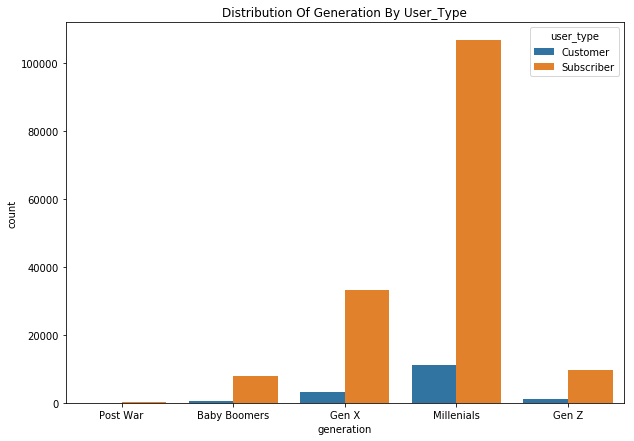

In [136]:
##to create the clustered bar chart for this, I make use of the function created earlier.


clust_bar('generation','user_type')



#plt.figure(figsize=(10,7))
#plt.title('Distribution of user types across the different generations')

#sb.countplot(data = ford_bike, x = 'generation', hue = 'user_type');


**Observation:** The heat map and clustered bar chart reveals that millenials have the highest number of subscribers across the generations. They also have the highest number of customers.
For the five generations, there are also more subscribers than customers. It is safe to say the riders tend to subscribe to the service than choosing to just be "regular" customers.

In the next step, I will be plotting bike share option across genders

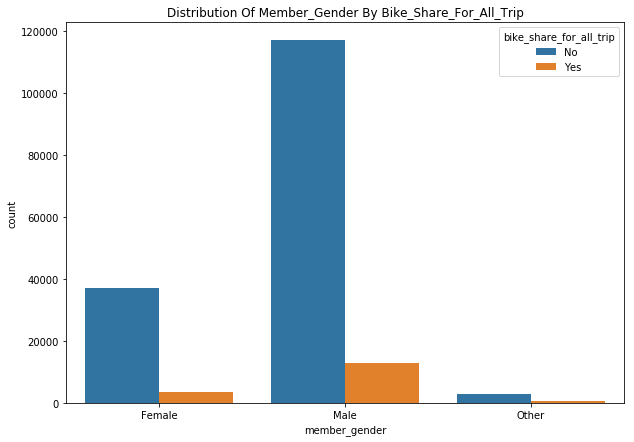

In [137]:
clust_bar('member_gender','bike_share_for_all_trip')

#plt.figure(figsize=(10,7))
#plt.title('Distribution of bike share option choice across genders')
#sb.countplot(data = ford_bike, x = 'member_gender', hue = 'bike_share_for_all_trip');


**Observation:** There is no relationship between gender and their choice of doing a bike share. All genders will rather not do a bike share for all trips.

For the next step, I will be plotting a distribution of genders across the different generations.

In [138]:
gen_member_cnt = ford_bike.groupby(['generation', 'member_gender']).size()
gen_member_cnt = gen_member_cnt.reset_index(name = 'count')
gen_member_cnt = gen_member_cnt.pivot(index='generation', columns = 'member_gender', values = 'count')
gen_member_cnt

member_gender,Female,Male,Other
generation,,,
Post War,35,231,26
Baby Boomers,1636,6817,201
Gen X,7030,28407,923
Millenials,29481,86066,2301
Gen Z,2357,8344,145


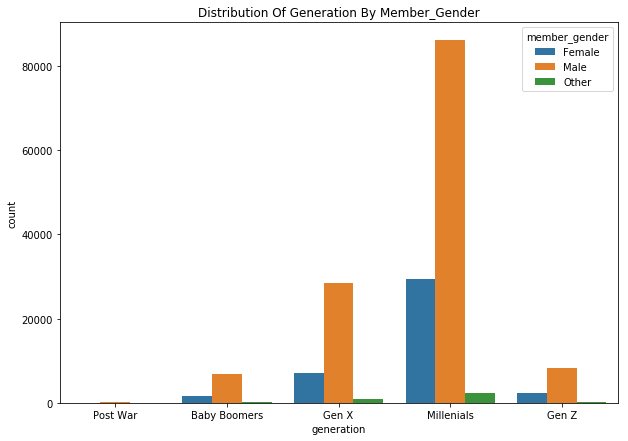

In [139]:
clust_bar('generation','member_gender')


#plt.figure(figsize=(10,7))
#plt.title('Number of riders for each gender across the different generations')

#sb.countplot(data = ford_bike, x = 'generation', hue = 'member_gender');


**Observation:** The chart above reveals that the male gender has the most number of riders across the five generations. The gender with the least riders is Others.

The next step shows number of riders per week day across the different user types

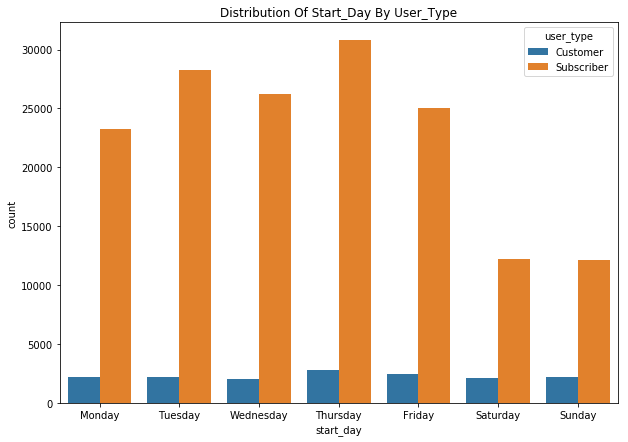

In [140]:
clust_bar('start_day','user_type')


#plt.figure(figsize=(10,7))
#plt.title('Number of riders per week day across the different user types')

#sb.countplot(data = ford_bike, x = 'start_day', hue = 'user_type')
#plt.ylabel('number of riders');

**Observation:** For both user types, Thursday is the busiest day of the week

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed that the generation and ride duration have a slight relationship. Those with older ages had less ride duration compared to the other ages. However, I had assumed that Millenials and Gen Z will be the category with higher durations (maybe more strength due to age/ more fun activities as per, they are "youths") but that was not the case.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> My initial assumption was that on weekend days, there will be more riders who were customers than subscribers. Maybe because these people would use only on weekends and would not want to subscribe instead. However, even on weekends, there are more subscribers using the service.

## Multivariate Exploration



**Question:** Investigate user_type, generation and trip duration in minutes (duration_min)

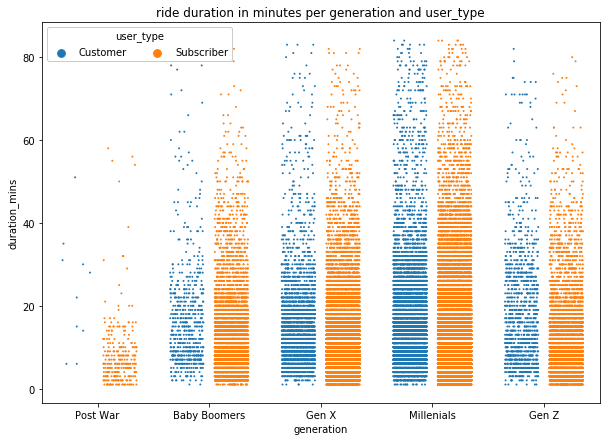

In [141]:
plt.figure(figsize=(10,7))

ax = sb.stripplot(data = ford_bike, x = 'generation', y = 'duration_mins', hue = 'user_type', size = 2, jitter = 0.3, dodge = True)
plt.title('ride duration in minutes per generation and user_type')
ax.legend(loc = 0, ncol = 3, framealpha = 1, title = 'user_type');

**Observation:** The difference between duration minutes of the generations asides Post War is not a lot. It is similar. However, the subscribers among Post War riders have a higher duration time.

**Question:** Is there a difference in the hourly usage for the different user types?

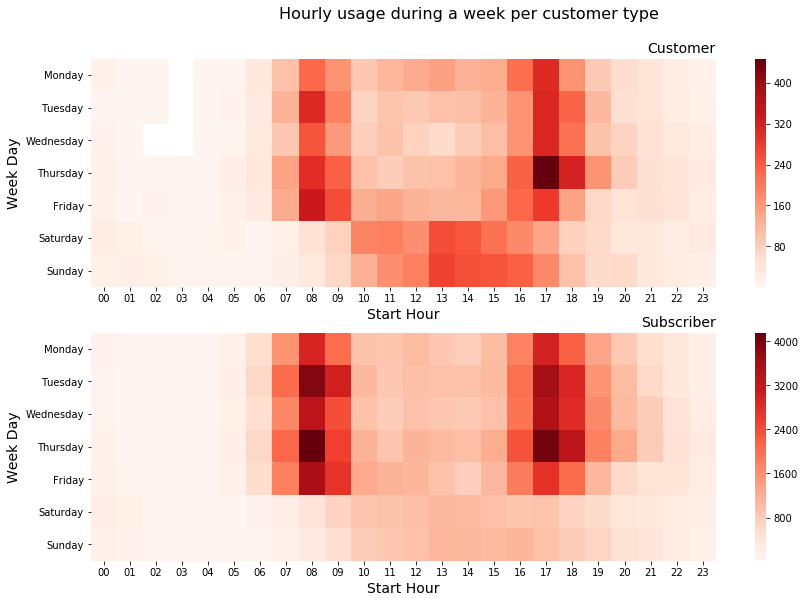

In [142]:
plt.figure(figsize=(14,9))

plt.subplot(2, 1, 1)
customer = ford_bike.query('user_type == "Customer"')
cust_counts = customer.groupby(['start_day', 'start_hour']).size()
cust_counts = cust_counts.reset_index(name='count')
cust_counts = cust_counts.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(cust_counts, cmap="Reds");
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Start Hour', fontsize=14);
plt.ylabel('Week Day', fontsize=14);

plt.subplot(2, 1, 2)
subscriber = ford_bike.query('user_type == "Subscriber"')
sub_counts = subscriber.groupby(['start_day', 'start_hour']).size()
sub_counts = sub_counts.reset_index(name='count')
sub_counts = sub_counts.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(sub_counts, cmap="Reds");
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Start Hour', fontsize=14);
plt.ylabel('Week Day', fontsize=14);

plt.subplots_adjust(top=0.9)
plt.suptitle('Hourly usage during a week per customer type', fontsize=16);

**Observation:** For customers, the busier time is 5pm on Thursdays. However, for subscribers, the busy days and times are 8am and 5pm on weekdays, with Thursdays being the busiest.

**Question:** Trip Duration for The week Days across User Types

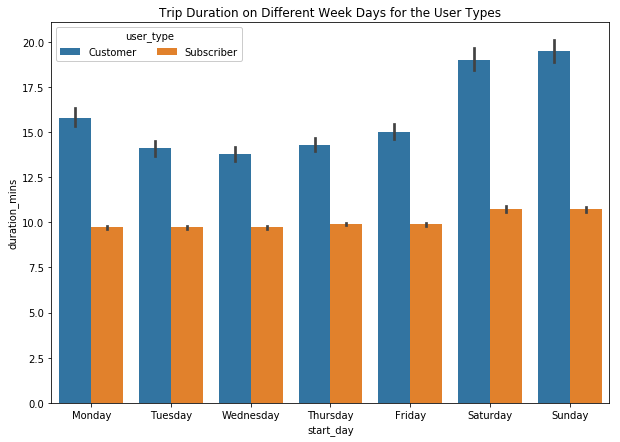

In [143]:
plt.figure(figsize=(10,7))

ax = sb.barplot(data = ford_bike, x = 'start_day', y = 'duration_mins', hue = 'user_type')
ax.legend(loc = 0, ncol = 3, framealpha = 1, title = 'user_type')
plt.title('Trip Duration on Different Week Days for the User Types');

**Observation:** The plot above shows that there are higher ride durations on weekend days (Saturday and Sunday) compared to the other days of the week, with customers having higher ride times than subscribers

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I realised there are more relationships between the day of the week and the ride duration, compared to what was seen in earlier visualisations. There were also more customers on weekends than subscribers



## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.
* There are more millenials who use thr bike sharing system compared to the other generations
+ There are also more customers using this service on weekends, compared to subscribers. I assume the customers use it for fun/recreation while subscribers use it for work/to transport to their offices or work places
+ Between 10am and 5pm, there are little or no rides by customers on every day of the week
+ There are also more subscribers of this service than customers
+ The busiest day of the week is Thursday for both customers and subscribers, perhaps, something special happens on Thursdays...
+ Subscribers use the bike sharing services mainly at 8am and 5pm, which is likely because this falls around work opening and closing hours. 